In [21]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

# Hitta projektroten (om vi står i notebooks/, gå upp en nivå)
ROOT = Path.cwd()
if not (ROOT / "data").exists():
    ROOT = ROOT.parent

# Välj cleaned om den finns, annars rådata
cand = [ROOT / "data" / "cleaned_taxi.csv",
        ROOT / "data" / "taxi_trip_pricing.csv"]

path = next((p for p in cand if p.exists()), None)
if path is None:
    raise FileNotFoundError("Hittar varken data/cleaned_taxi.csv eller data/taxi_trip_pricing.csv")

print("CWD:", Path.cwd())
print("Läser från:", path)

# Läs och normalisera kolumnnamn
df = pd.read_csv(path)
rename_map = {
    "Trip_Distance_km": "distance_km",
    "Trip_Duration_Minutes": "duration_min",
    "Trip_Price": "fare",
    "Passengers": "passenger_count",
    "trip_distance_km": "distance_km",
    "trip_duration_minutes": "duration_min",
    "trip_price": "fare",
    "passengers": "passenger_count",
}
df = df.rename(columns=rename_map)

print("Kolumner:", df.columns.tolist())
required = {"distance_km","duration_min","passenger_count","fare"}
print("Har alla nödvändiga kolumner?", required.issubset(df.columns))

df.head()



CWD: c:\Users\joaki\Desktop\taxi-prediction\taxi-prediction-fullstack-joakim-olausson\notebooks
Läser från: c:\Users\joaki\Desktop\taxi-prediction\taxi-prediction-fullstack-joakim-olausson\data\cleaned_taxi.csv
Kolumner: ['distance_km', 'duration_min', 'passenger_count', 'fare']
Har alla nödvändiga kolumner? True


,distance_km,duration_min,passenger_count,fare
0,19.35,53.82,3.0,36.2624
1,47.59,40.57,1.0,50.7425
2,36.87,37.27,1.0,52.9032
3,30.33,116.81,4.0,36.4698
4,8.64,89.33,2.0,60.2028


In [22]:
print("Saknade värden per kolumn:")
print(df.isna().sum().to_string())
df[["distance_km","duration_min","passenger_count","fare"]].describe()


Saknade värden per kolumn:
distance_km        0
duration_min       0
passenger_count    0
fare               0


,distance_km,duration_min,passenger_count,fare
count,883.000000,883.000000,883.000000,883.000000
mean,26.312746,62.725164,2.465459,54.739378
std,17.163716,31.974207,1.077336,30.282229
min,1.230000,5.010000,1.000000,11.261300
25%,12.755000,36.335000,2.000000,35.070900
50%,25.870000,62.630000,2.000000,50.742500
75%,38.295000,89.280000,3.000000,66.769450
max,139.062230,119.840000,4.000000,276.840597


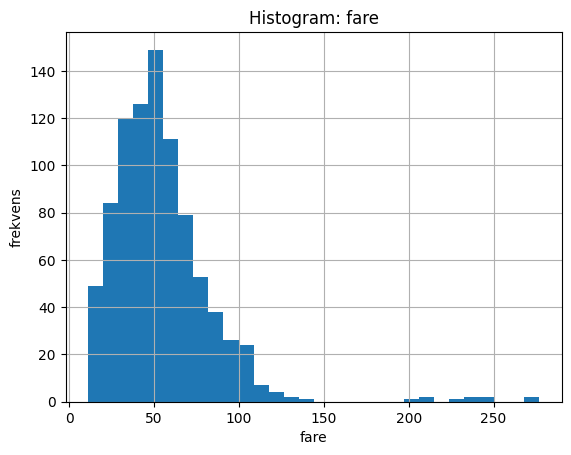

In [23]:
df["fare"].hist(bins=30)
plt.xlabel("fare"); plt.ylabel("frekvens"); plt.title("Histogram: fare")
plt.show()


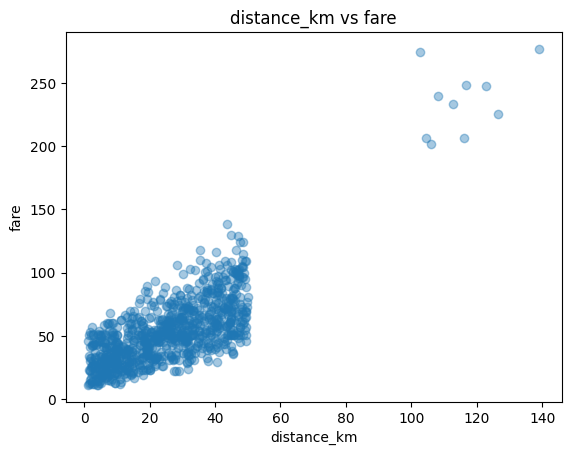

In [24]:
plt.scatter(df["distance_km"], df["fare"], alpha=0.4)
plt.xlabel("distance_km"); plt.ylabel("fare"); plt.title("distance_km vs fare")
plt.show()


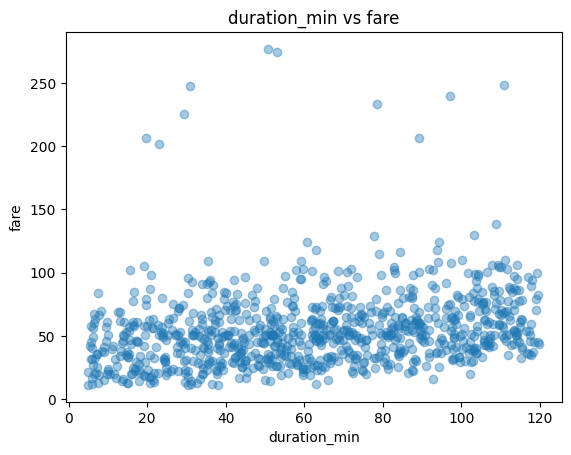

In [25]:
plt.scatter(df["duration_min"], df["fare"], alpha=0.4)
plt.xlabel("duration_min"); plt.ylabel("fare"); plt.title("duration_min vs fare")
plt.show()


In [26]:
df[["distance_km","duration_min","passenger_count","fare"]].corr()


,distance_km,duration_min,passenger_count,fare
distance_km,1.000000,-0.066907,-0.057819,0.782912
duration_min,-0.066907,1.000000,0.033102,0.234924
passenger_count,-0.057819,0.033102,1.000000,-0.005591
fare,0.782912,0.234924,-0.005591,1.000000
